<a href="https://colab.research.google.com/github/roychowdary1597/Airline-Passenger-Satisfaction/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 5.3 MB/s eta 0:00:00


In [4]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 721.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 122.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 112.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.0 MB/s eta 0:00:00


In [7]:
!pip install openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 9.3 MB/s eta 0:00:00


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.impute import SimpleImputer

from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout,InputLayer
from keras import regularizers

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import keras_tuner as kt

import joblib
import os

In [9]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Deep Learning ANN/satisfaction.xlsx')

In [10]:
df.drop(columns='id',axis=1,inplace=True)

In [11]:
# Renaming Columns for our fesability
df = df.rename(columns={'satisfaction_v2':'satisfaction', 'Gender':'gender', 'Customer Type':'customer_type',
                        'Age':'age', 'Type of Travel':'travel_type', 'Class':'class', 'Flight Distance':'distance',
                        'Seat comfort':'seat_comfort', 'Departure/Arrival time convenient':'dep_val_time_convenient',
                        'Food and drink':'food_drink', 'Gate location':'gate','Inflight wifi service':'wifi_service',
                        'Inflight entertainment':'entertainment','Online support':'online_support',
                        'Ease of Online booking':'online_booking_service','On-board service':'onboard_service',
                        'Leg room service':'leg_room_service','Baggage handling':'baggage_handling',
                        'Checkin service':'checkin_service','Cleanliness':'cleanliness','Online boarding':'online_boarding',
                        'Departure Delay in Minutes':'departure_delay_minutes','Arrival Delay in Minutes':'arrival_delay_minutes'})

In [12]:
# Dropping nulls
df = df.dropna(axis=0)

In [13]:
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})

In [14]:
#Splitting X and y
X = df.drop(columns=["satisfaction"])
y = df["satisfaction"]

In [15]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [16]:
# Trainvalset and test set

X_trainval,X_test,y_trainval,y_test = train_test_split(X,y,test_size = 0.2,
                                                       stratify=y,
                                                       random_state=42)

In [17]:
# train and validation

X_train,X_val,y_train,y_val = train_test_split(X_trainval,y_trainval,test_size = 0.2,
                                                       stratify=y_trainval,
                                                       random_state=13)

In [18]:
numeric_transformer = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ]
)

In [19]:
categorical_transformer = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
    ]
)

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [21]:
# Fit on TRAIN only (no leakage)
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'distance', 'seat_comfort',
                                  'dep_val_time_convenient', 'food_drink',
                                  'gate', 'wifi_service', 'entertainment',
                                  'online_support', 'online_booking_service',
                                  'onboard_service', 'leg_room_service',
                                  'baggage_handling', 'checkin_service',
                                  'cleanliness', 'online_boarding',
                                  'departure_delay_minutes',
                                  'arrival_delay_minutes']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['gender', 'customer_type', 'travel_type',
                                  'class'])])

In [22]:
# Transform splits
X_train_transformed = preprocessor.transform(X_train)
X_val_transformed   = preprocessor.transform(X_val)
X_test_transformed  = preprocessor.transform(X_test)

In [23]:
# Model Structure

Model = Sequential()

#Input layer
Model.add(InputLayer(shape = (X_train_transformed.shape[1],)))

# Hidden layer - 1
Model.add(Dense(units = 128,activation="relu",kernel_initializer="he_normal",kernel_regularizer = regularizers.l1(0.003)))
Model.add(Dropout(0.13))
Model.add(BatchNormalization())

# Hidden layer -2
Model.add(Dense(units = 64,activation="relu",kernel_initializer="he_normal",kernel_regularizer = regularizers.l1(0.003)))
Model.add(Dropout(0.10))
Model.add(BatchNormalization())

# Hidden layer -3
Model.add(Dense(units = 32,activation="relu",kernel_initializer="he_normal",kernel_regularizer = regularizers.l1(0.003)))
Model.add(Dropout(0.13))
Model.add(BatchNormalization())

#Output layer
Model.add(Dense(units = 1,activation="sigmoid",kernel_initializer="he_normal",kernel_regularizer = regularizers.l1(0.003)))

In [24]:
Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,849 (58.00 KB)

 Trainable params: 14,401 (56.25 KB)

 Non-trainable params: 448 (1.75 KB)

In [25]:
# COmpling model

Model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [26]:
# Trianing

history = Model.fit(X_train_transformed,y_train,batch_size=64,epochs= 50,validation_data=(X_val_transformed,y_val))

Epoch 1/50
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8456 - loss: 3.1704 - val_accuracy: 0.9295 - val_loss: 0.4264
Epoch 2/50
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9142 - loss: 0.3865 - val_accuracy: 0.9377 - val_loss: 0.2671
Epoch 3/50
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9239 - loss: 0.2981 - val_accuracy: 0.9293 - val_loss: 0.2677
Epoch 4/50
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9222 - loss: 0.2893 - val_accuracy: 0.9418 - val_loss: 0.2394
Epoch 5/50
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9261 - loss: 0.2757 - val_accuracy: 0.9396 - val_loss: 0.2340
Epoch 6/50
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9243 - loss: 0.2730 - val_accuracy: 0.9413 - val_loss: 0.2292
Epoch 7/50
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9264 - loss: 0.2684 - val_accuracy: 0.9418 - val_loss: 0.2293
Epoch 8/50
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9247 - loss: 0.2681 - 

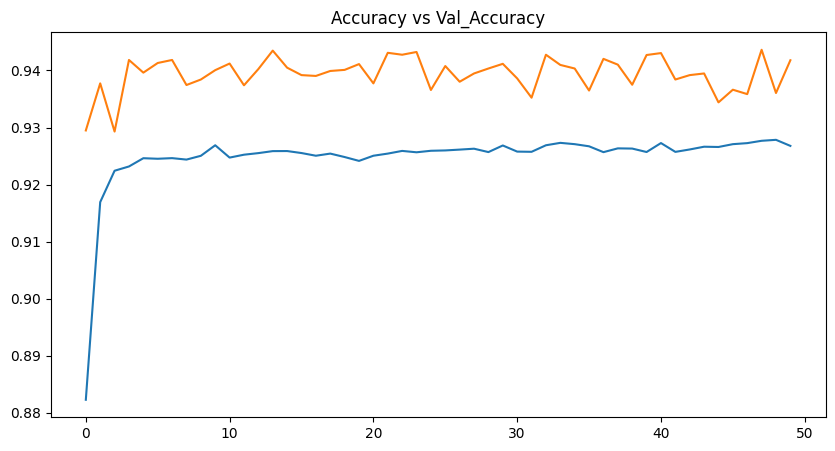

In [27]:
plt.figure(figsize= (10,5))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy vs Val_Accuracy")
plt.show()

In [28]:
# Evalution

y_pred = (Model.predict(X_test_transformed) > 0.5).astype("int")

810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 586us/step


In [29]:
accuracy_score(y_pred,y_test)

0.9398795273766314

In [31]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.95      0.92      0.93     12104\n           1       0.93      0.96      0.94     13794\n\n    accuracy                           0.94     25898\n   macro avg       0.94      0.94      0.94     25898\nweighted avg       0.94      0.94      0.94     25898\n'

In [32]:
class_names = ["neutral or dissatisfied", "satisfied"]

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
y_proba = Model.predict(X_test_transformed)


y_pred = (y_proba.ravel() >= 0.5).astype(int)


test_accuracy = accuracy_score(y_test, y_pred)


report = classification_report(
    y_test,
    y_pred,
    target_names=class_names,
    digits=4
)

#  Confusion matrix (optional but useful)
cm = confusion_matrix(y_test, y_pred)


print("\n====== TEST SET EVALUATION ======")
print(f"Accuracy : {test_accuracy:.4f}\n")

print("Classification Report:\n")
print(report)

print("Confusion Matrix :")
print(cm)

810/810 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step

====== TEST SET EVALUATION ======
Accuracy : 0.9399

Classification Report:

                         precision    recall  f1-score   support

neutral or dissatisfied     0.9199    0.9499    0.9346     11721
              satisfied     0.9574    0.9316    0.9443     14177

               accuracy                         0.9399     25898
              macro avg     0.9387    0.9407    0.9395     25898
           weighted avg     0.9404    0.9399    0.9400     25898

Confusion Matrix :
[[11134   587]
 [  970 13207]]
